
## Comments on what this notebook does: 

 * Loading of file called: 'data_all_french.csv', which is the combined data frame 
 * Plotting some variables 
 * Plotting correlation matrix of numeric variables 
 


In [2]:
# First of all import the required libraries 
# Data and math  
import pandas as pd
import numpy as np 

# Visualisation 
import matplotlib.pyplot as plt  # für Matplotlib
import seaborn as sns            # für Seaborn
import plotly.express as px      # für Plotly Express
#%matplotlib inline

# Import System Libraries 
import warnings
import os
# Ignor all warnings, because there is a front problem with mach 
warnings.filterwarnings("ignore")


# Loading the Data 

In [11]:
# Loading data of the combined french datasets 

# Path to the neighbouring 'data' folder
data_path = os.path.abspath(os.path.join(os.getcwd(), '..', '..','data'))

# Check path
print(data_path + '/data_all_french.csv')

# Load csv data
data_all = pd.read_csv(os.path.join(data_path, 'data_all_french.csv'))

# Show head to be sure 
print(data_all.head())

/Users/tillo/Repositoriums/aug24_bds_int---co2/data/data_all_french.csv
        Brand        Model    Type Mines                      CNIT Fuel Type  \
0  VOLKSWAGEN  LUPO 3L TDI  MVW70C1R4385  6ESCANYX01AGFD5850021N0H        GO   
1  VOLKSWAGEN  LUPO 3L TDI  MVW70C1RX572  6ESCAYZX01AGFD5850021N0H        GO   
2  VOLKSWAGEN  LUPO 3L TDI  MVW70C1R5386  6ESCANYX01AGFD5850021N0I        GO   
3  VOLKSWAGEN  LUPO 3L TDI  MVW70C1R6387  6ESCANYX01AGFD5850021N1H        GO   
4  VOLKSWAGEN  LUPO 3L TDI  MVW70C1RY573  6ESCAYZX01AGFD5850021N0I        GO   

    CV  Engine Power Transmission  Urban Consumption  Extra Urban Consumption  \
0  3.0          45.0          A 5                3.6                      2.7   
1  3.0          45.0          A 5                3.6                      2.7   
2  3.0          45.0          A 5                3.8                      2.8   
3  3.0          45.0          A 5                4.0                      2.7   
4  3.0          45.0          A 5         

# Correlation heatmap

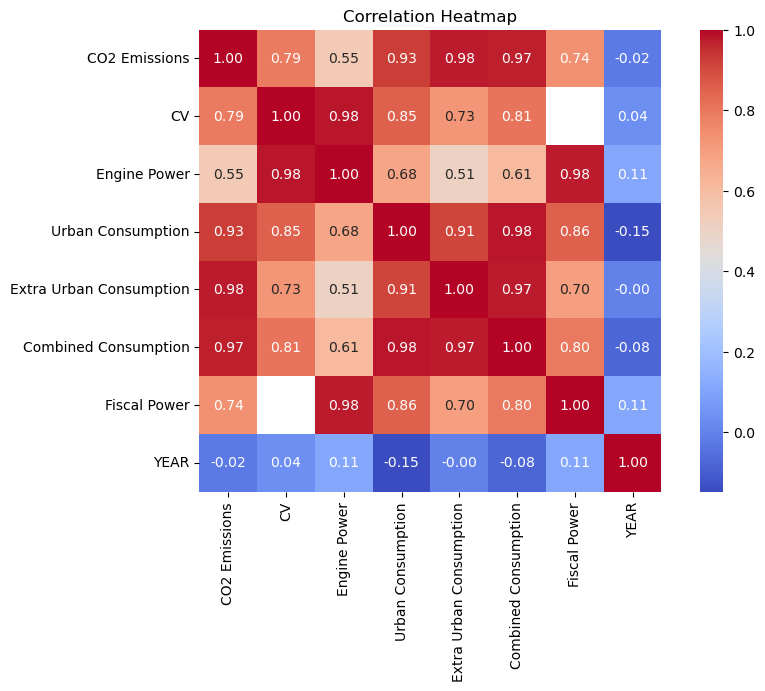

In [12]:
# Correlation of several 

# Select the columns to analyze
columns_to_analyze = ['CO2 Emissions', 'CV', 'Engine Power', 'Urban Consumption', 'Extra Urban Consumption', 'Combined Consumption', 'Fiscal Power', 'YEAR']

# Calculate the correlation matrix
correlation_matrix = data_all[columns_to_analyze].corr()

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)
plt.title('Correlation Heatmap')
plt.show()

# Plotting CO2 emission

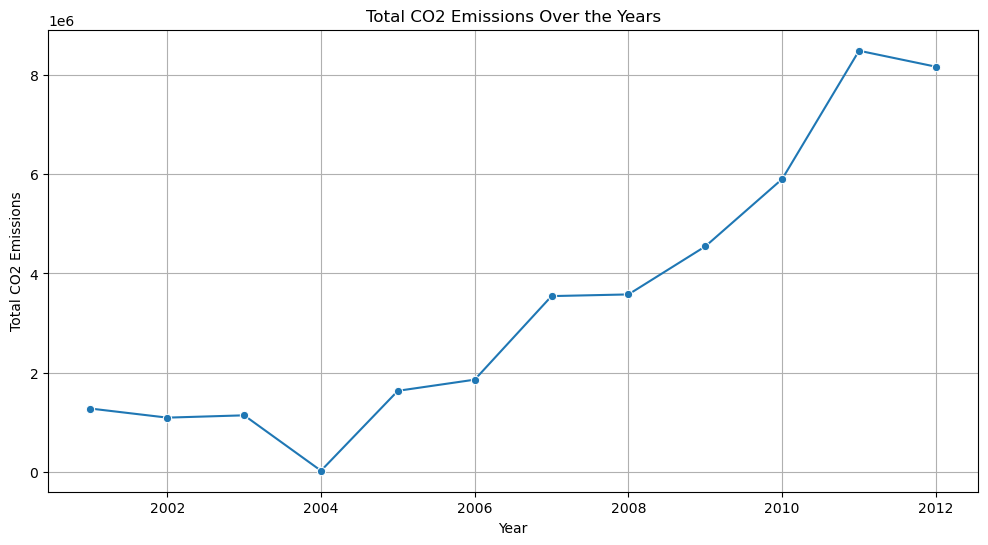

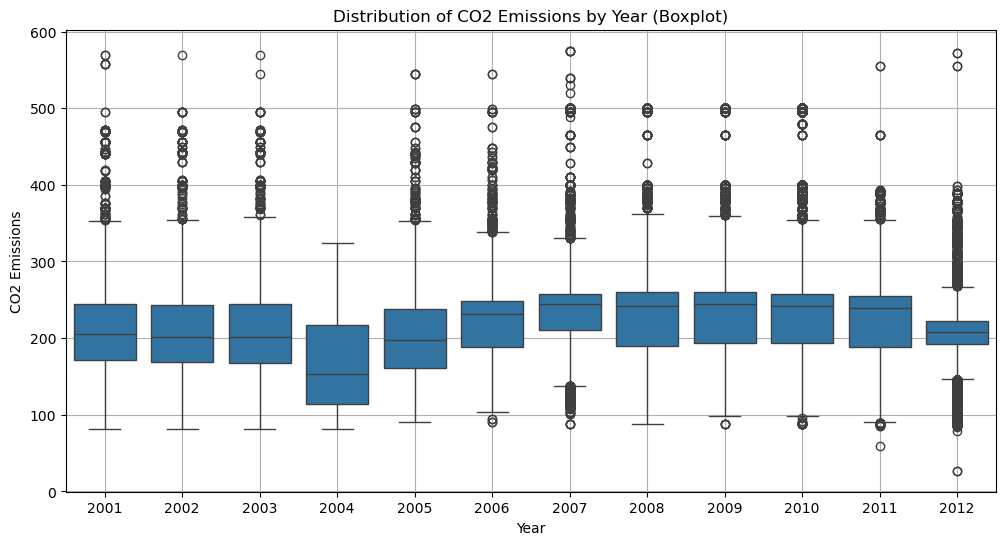

In [14]:
# Total CO2 emissions over the year

# Ensure CO2 is of numeric type
data_all['CO2 Emissions'] = pd.to_numeric(data_all['CO2 Emissions'], errors='coerce')

# Group by year and sum CO2 emissions
total_co2_by_year = data_all.groupby('YEAR')['CO2 Emissions'].sum().reset_index()

# Set the size of the plot
plt.figure(figsize=(12, 6))

# Create the line plot
sns.lineplot(data=total_co2_by_year, x='YEAR', y='CO2 Emissions', marker='o')

# Add titles and labels
plt.title('Total CO2 Emissions Over the Years')
plt.xlabel('Year')
plt.ylabel('Total CO2 Emissions')
plt.grid()

# Show the plot
plt.show()


# Set the figure size
plt.figure(figsize=(12, 6))

# Create a boxplot to show the distribution of CO2 emissions by year
sns.boxplot(data=data_all, x='YEAR', y='CO2 Emissions')

# Add titles and labels
plt.title('Distribution of CO2 Emissions by Year (Boxplot)')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions')
plt.grid(True)

# Show the plot
plt.show()

# Plotting total entries over the different years

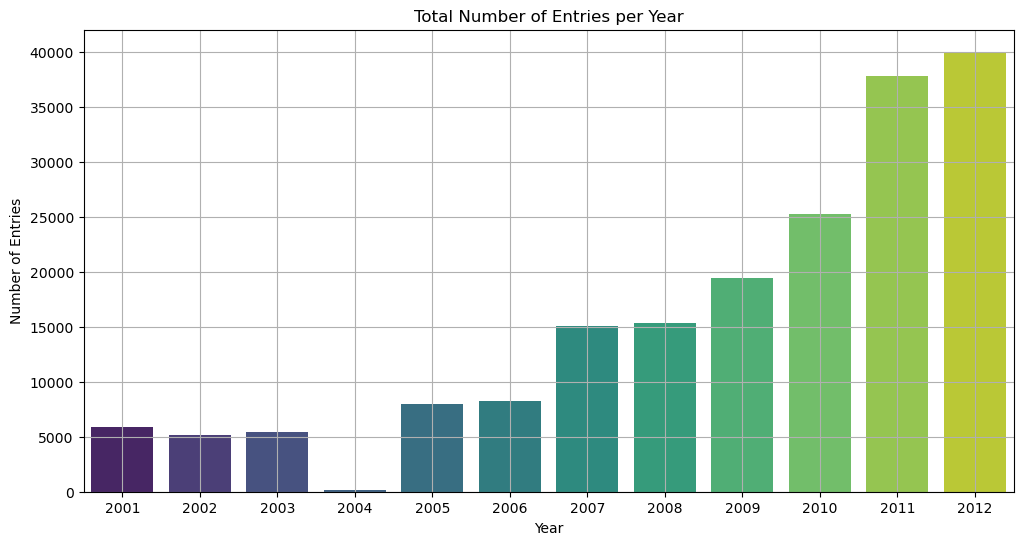

In [16]:
# Total entries per year 
# Group by year and count the number of entries per year
entries_per_year = data_all.groupby('YEAR').size().reset_index(name='Number of Entries')

# Set the figure size
plt.figure(figsize=(12, 6))

# Create a barplot to show the number of entries per year
sns.barplot(data=entries_per_year, x='YEAR', y='Number of Entries', palette='viridis')

# Add titles and labels
plt.title('Total Number of Entries per Year')
plt.xlabel('Year')
plt.ylabel('Number of Entries')
plt.grid(True)

# Show the plot
plt.show()
